In [7]:
import torch
import numpy as np
import matplotlib.pyplot as plt
model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet18', pretrained=True)
model.eval()

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [2]:
# Download an example image from the pytorch website
import urllib
url, filename = ("https://github.com/pytorch/hub/raw/master/images/dog.jpg", "dog.jpg")
try: urllib.URLopener().retrieve(url, filename)
except: urllib.request.urlretrieve(url, filename)

In [3]:
# sample execution (requires torchvision)
from PIL import Image
from torchvision import transforms
input_image = Image.open(filename)
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

# move the input and model to GPU for speed if available
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')

with torch.no_grad():
    output = model(input_batch)
# Tensor of shape 1000, with confidence scores over Imagenet's 1000 classes
print(output[0])
# The output has unnormalized scores. To get probabilities, you can run a softmax on it.
probabilities = torch.nn.functional.softmax(output[0], dim=0)
print(probabilities)

tensor([ 1.5916e-02, -1.5497e+00,  3.2030e-01, -2.0585e+00, -8.5747e-01,
         1.7843e+00,  1.4699e+00,  2.1626e+00,  4.4888e+00,  8.2885e-01,
        -5.7819e+00, -3.4969e+00, -4.0621e+00, -4.7517e+00, -3.8072e+00,
        -4.7243e+00, -1.2590e+00,  2.9813e-01, -2.0459e+00, -5.2885e-01,
        -3.5982e+00, -8.1424e-01, -2.7651e+00, -1.2770e+00, -3.4182e+00,
        -1.9048e+00, -3.0018e+00, -1.3471e+00, -1.8391e+00,  1.3937e+00,
        -2.0114e+00, -1.4137e+00, -2.3287e+00, -1.8198e+00, -1.1914e-01,
        -3.4102e+00, -1.6544e+00, -3.4496e+00, -2.6479e+00, -2.7407e+00,
        -2.2193e+00, -3.6509e+00, -4.1255e+00, -5.5946e+00, -1.7519e+00,
        -1.6900e+00, -9.8164e-01, -2.1251e+00, -3.5137e+00, -1.3320e+00,
        -1.1335e+00, -1.1564e+00, -2.2711e-02, -8.5797e-01, -1.2919e+00,
        -2.8682e+00,  6.6078e-01, -1.7178e+00, -1.2443e+00, -2.3362e+00,
        -5.7816e-02, -1.9204e+00, -2.5964e+00, -1.8020e+00, -1.5125e+00,
        -1.0843e+00, -4.0987e-01, -1.3090e+00, -9.4

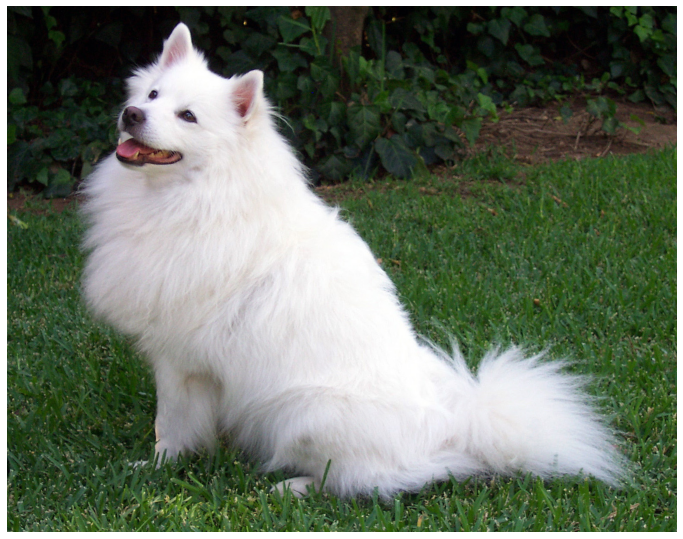

In [8]:
I1 = np.asarray(input_image,dtype=np.float32)/255
plt.figure(figsize=(12,12))
plt.imshow(I1)
plt.axis('off')
plt.show()

In [4]:
# Download ImageNet labels
!wget https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt

--2022-02-04 18:25:11--  https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10472 (10K) [text/plain]
Saving to: ‘imagenet_classes.txt’

imagenet_classes.tx 100%[===================>]  10.23K  --.-KB/s    in 0s      

2022-02-04 18:25:11 (79.3 MB/s) - ‘imagenet_classes.txt’ saved [10472/10472]



In [5]:
# Read the categories
with open("imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]
# Show top categories per image
top5_prob, top5_catid = torch.topk(probabilities, 5)
for i in range(top5_prob.size(0)):
    print(categories[top5_catid[i]], top5_prob[i].item())

Samoyed 0.8846225142478943
Arctic fox 0.045805174857378006
white wolf 0.0442761555314064
Pomeranian 0.005621383432298899
Great Pyrenees 0.004652013536542654
